In [1]:
# Set root folder
import sys
import os

cwd = os.getcwd()
folder = os.path.basename(cwd)
cwd = os.path.dirname(cwd)
folder = os.path.basename(cwd)
cwd = os.path.dirname(cwd)
folder = os.path.basename(cwd)
ROOT = os.path.join(cwd)

sys.path.append(ROOT)

import numpy as np
from core.population import Archive, Population
from environments.environments import *
from parameters import params
import matplotlib
import pickle as pkl
import analysis.utils as utils
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import json
%matplotlib inline

Root directory /home/giuseppe/src/cmans


In [2]:
cmaes_data_path = os.path.join(os.getcwd(), 'data/cmaes')
fit_data_path = os.path.join(os.getcwd(), 'data/fit')
areas = [0, 1, 2, 3]

# Plot max reward by eval

In [3]:
cmaes_data = {area: {'evaluated': [], 'reward': []} for area in areas}
fit_data = {area: {'evaluated': [], 'reward': []} for area in areas}

for area in areas:
    pop = Population(params)
    # CMAES
    area_path = os.path.join(cmaes_data_path, str(area))
    generation = 0   
    while os.path.exists(os.path.join(area_path, 'population_gen_{}.pkl'.format(generation))):
        pop.load(os.path.join(area_path, 'population_gen_{}.pkl'.format(generation)))
        for ev, r in zip(pop['evaluated'], pop['reward']):
            cmaes_data[area]['evaluated'].append(ev)
            cmaes_data[area]['reward'].append(r)
        generation += 1
        
    # Fit
    area_path = os.path.join(fit_data_path, str(area))
    generation = 0
    while os.path.exists(os.path.join(area_path, 'population_gen_{}.pkl'.format(generation))):
        pop.load(os.path.join(area_path, 'population_gen_{}.pkl'.format(generation)))
        for ev, r in zip(pop['evaluated'], pop['reward']):
            if ev not in fit_data[area]['evaluated']:
                fit_data[area]['evaluated'].append(ev)
                fit_data[area]['reward'].append(r)        
        generation += 1
            
    data = np.array([[ev, r] for ev, r in sorted(zip(fit_data[area]['evaluated'], fit_data[area]['reward']), key=lambda pair: pair[0])])
    fit_data[area]['evaluated'] = data[:, 0]
    fit_data[area]['reward'] = data[:, 1]       

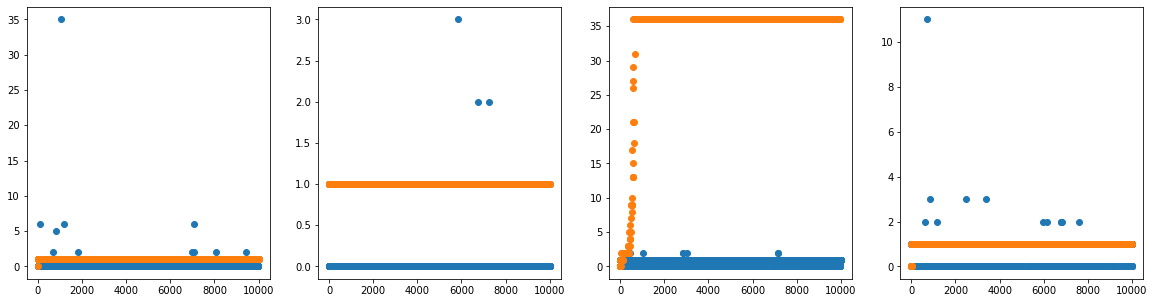

In [21]:
fig, axes = plt.subplots(1, len(areas), figsize=(len(areas)*5, 5))
for area in areas:
    axes[area].scatter(cmaes_data[area]['evaluated'], cmaes_data[area]['reward'])
    axes[area].scatter(fit_data[area]['evaluated'], fit_data[area]['reward'])